
  ![Imagen](https://upload.wikimedia.org/wikipedia/commons/d/df/UNL3.png)
    
 
# <center> UNIVERSIDAD NACIONAL DE LOJA </center>
 
## <center> Autor: John Alejandro Torres Alvarez </center>
## <center> Tutor : Ing. Alexander López, Mgs. </center>

## <center> <span style="color:red"> *Análisis de opinión en Twitter sobre el COVID-19 en ECUADOR*</span> </center>


In [108]:
# LIBRERIAS
import unidecode
import pickle
import random

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from palettable.colorbrewer.sequential import Reds_9
from palettable.cmocean.diverging import Balance_20
from palettable.tableau import BlueRed_12
from PIL import Image
from collections import Counter

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple (Balance_20.colors[random.randint(2,18)])

#from scipy.misc import imread

In [1]:

# Lectura de DATASET.CSV alojado en Google Drive
pd.read_csv("https://docs.google.com/spreadsheets/d/1Yb39azIkdDUQdpi-jsnejlpLc8pIFOoOUDyV8M4Hayo/export?format=csv")



,Column1,text,POSITIVO,NEGATIVO,POSITIVO/NEGATIVO,Mejor_Ajuste
0,1,teoria creacion covid arma biologica,999716002839876,999716002839876,1,neutral
1,2,hermana abuelito superado peligro covid guerre...,190929870135862,76330817994891,250134709873856,negativo
2,3,remdesivir medicamento acaban inventar curar c...,281888139987736,384258705854669,733589469003077,negativo
3,4,medios residencia universitaria alojara person...,37284640983961,289496337331108,128791408304821,positivo
4,5,padrastro recupero covid,901333043211341,520923176042722,173026097640436,positivo
...,...,...,...,...,...,...
149072,149073,covid,901333043211341,520923176042722,173026097640436,positivo
149073,149074,alerta mundial oms alerta record infecciones c...,463804679691485,999716002839876,463936436321878,positivo
149074,149075,trabajo articulado alcaldia puerto rico meta b...,37284640983961,999716002839876,372952327241408,positivo
149075,149076,mona hedionda quizas aplaste carro covid no ma...,190929870135862,384258705854669,496878449926581,negativo


In [6]:
tuits_df = pd.read_csv("https://docs.google.com/spreadsheets/d/1Yb39azIkdDUQdpi-jsnejlpLc8pIFOoOUDyV8M4Hayo/export?format=csv")


In [8]:
tuits_df[(tuits_df.text != "null") & (tuits_df.Mejor_Ajuste == "positivo")]

,Column1,text,POSITIVO,NEGATIVO,POSITIVO/NEGATIVO,Mejor_Ajuste
3,4,medios residencia universitaria alojara person...,37284640983961,289496337331108,128791408304821,positivo
4,5,padrastro recupero covid,901333043211341,520923176042722,173026097640436,positivo
8,9,costa objetivo brindar atencion medica oportun...,736679489247107,194733968807548,378300454593597,positivo
9,10,billeteras tarjetas creditos digitales fintech...,999716002839876,520923176042722,191912368045204,positivo
10,11,covid derechos laborales ambato detalles,190929870135862,520923176042722,366522126326365,positivo
...,...,...,...,...,...,...
149071,149072,tiempos libres covid estuviera disfrazada male...,999716002839876,520923176042722,191912368045204,positivo
149072,149073,covid,901333043211341,520923176042722,173026097640436,positivo
149073,149074,alerta mundial oms alerta record infecciones c...,463804679691485,999716002839876,463936436321878,positivo
149074,149075,trabajo articulado alcaldia puerto rico meta b...,37284640983961,999716002839876,372952327241408,positivo


<AxesSubplot:xlabel='POSITIVO/NEGATIVO', ylabel='Count'>

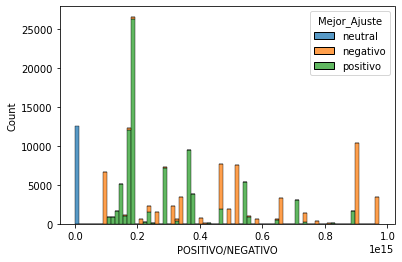

In [62]:
sns.histplot(data = tuits_df, x= "POSITIVO/NEGATIVO",hue="Mejor_Ajuste", multiple="stack")

c:\users\alejandrodelatorre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='POSITIVO/NEGATIVO', ylabel='Density'>

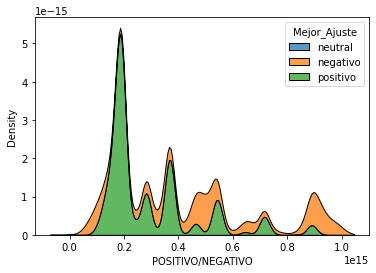

In [63]:
sns.kdeplot(data = tuits_df, x= "POSITIVO/NEGATIVO",hue="Mejor_Ajuste", multiple="stack")

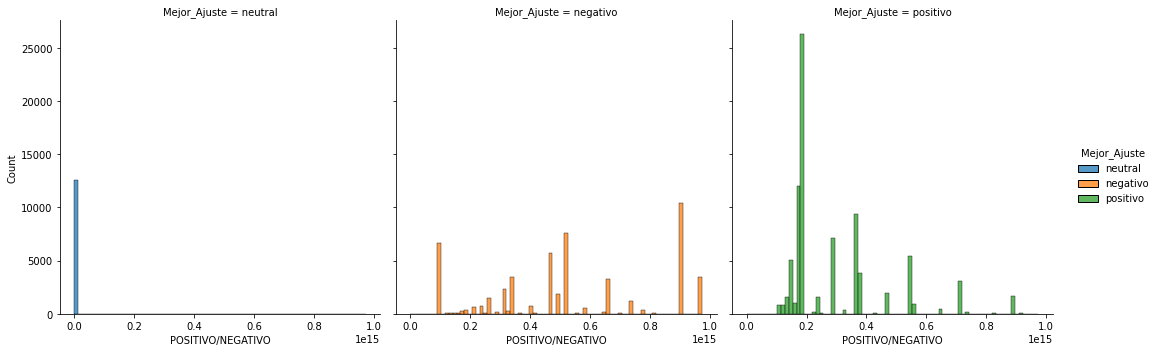

In [64]:
sns.displot(data = tuits_df, x= "POSITIVO/NEGATIVO",hue="Mejor_Ajuste", col="Mejor_Ajuste")

<AxesSubplot:xlabel='Mejor_Ajuste', ylabel='Count'>

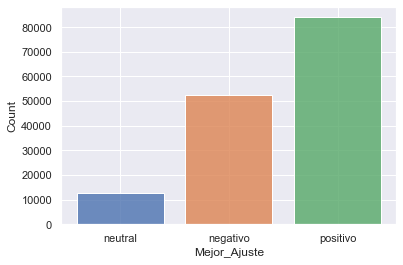

In [95]:

sns.histplot(data = tuits_df, x= "Mejor_Ajuste",hue="Mejor_Ajuste", shrink=.8, alpha=.8, legend=False)


In [48]:
# cargar de df segun polaridad


In [9]:
tuits_positivos_df = tuits_df[(tuits_df.text != "null") & (tuits_df.Mejor_Ajuste == "positivo")]
tuits_negativos_df = tuits_df[(tuits_df.text != "null") & (tuits_df.Mejor_Ajuste == "negativo")]
tuits_neutros_df = tuits_df[(tuits_df.text != "null") & (tuits_df.Mejor_Ajuste == "neutral")]

In [113]:
textos = ' '.join(tuits_positivos_df.fillna('')['text'].tolist())
len(textos)


8900253

In [117]:
sumarSW = open("stopwords.txt","r").read().splitlines()
SW = set (STOPWORDS)
for palabra in sumarSW:
    SW.add(palabra)

In [118]:
SW.add('q')
SW.add('si')
SW.add('no')

In [119]:
wc= WordCloud(
    background_color="rgba(255,255,255,0)",mode="RGBA",
    width=1800,
    height=1400,
    stopwords=SW

).generate(textos)
wc.recolor(color_func=color_func, random_state=3)

<IPython.core.display.Javascript object>


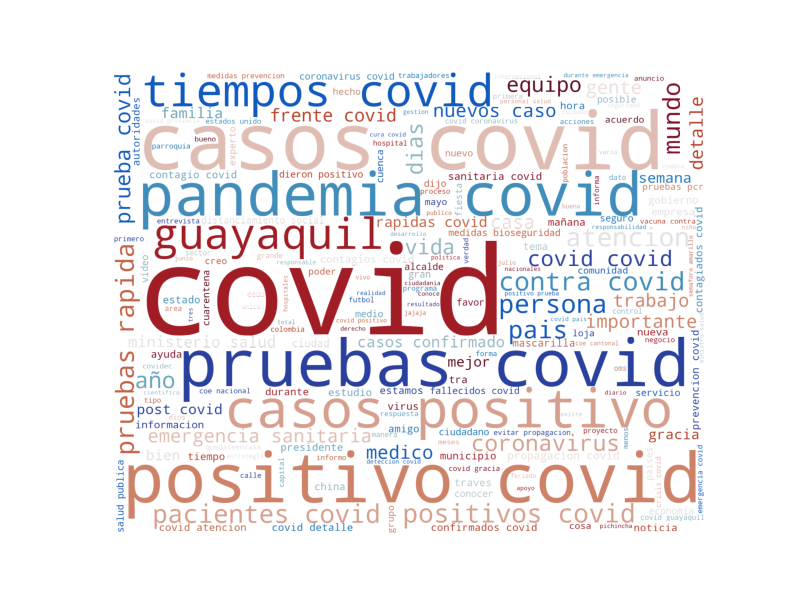

In [121]:
%matplotlib notebook
plt.imshow(wc)
plt.axis('off')
plt.savefig('./Positivos.png',dpi=600)
plt.show()